In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print('Training Set:',train_X.shape,train_Y.shape)
print('Testing Set:',test_X.shape,test_Y.shape)

Training Set: (60000, 28, 28) (60000,)
Testing Set: (10000, 28, 28) (10000,)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
classes=np.unique(train_Y)
nclasses=len(classes)
print('Output Classes:',classes)

Output Classes: [0 1 2 3 4 5 6 7 8 9]


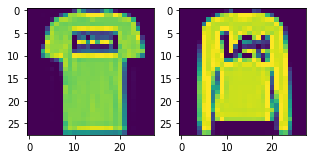

In [5]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[1])
plt.subplot(122)
plt.imshow(test_X[1])

In [6]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255
test_X=test_X/255

In [7]:
import tensorflow
from tensorflow.keras.utils import to_categorical
train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

SyntaxError: ignored

In [12]:
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
batch_size = 64
epochs = 20
num_classes = 10

In [13]:
fashion_model=Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [14]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 83s 109ms/step - loss: 0.4563 - accuracy: 0.8346 - val_loss: 0.3418 - val_accuracy: 0.8756
Epoch 2/20
750/750 [==============================] - 82s 109ms/step - loss: 0.2858 - accuracy: 0.8977 - val_loss: 0.2877 - val_accuracy: 0.8907
Epoch 3/20
750/750 [==============================] - 82s 109ms/step - loss: 0.2436 - accuracy: 0.9109 - val_loss: 0.2540 - val_accuracy: 0.9093
Epoch 4/20
750/750 [==============================] - 83s 111ms/step - loss: 0.2074 - accuracy: 0.9239 - val_loss: 0.2593 - val_accuracy: 0.9034
Epoch 5/20
750/750 [==============================] - 82s 110ms/step - loss: 0.1822 - accuracy: 0.9329 - val_loss: 0.2212 - val_accuracy: 0.9193
Epoch 6/20
750/750 [==============================] - 82s 110ms/step - loss: 0.1569 - accuracy: 0.9427 - val_loss: 0.2465 - val_accuracy: 0.9147
Epoch 7/20
750/750 [==============================] - 94s 125ms/step - loss: 0.1378 - accuracy: 0.9489 - val_loss: 0.2479 - val_ac

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(test_eval)

313/313 [==============================] - 4s 13ms/step - loss: 0.4679 - accuracy: 0.9161
[0.46791088581085205, 0.916100025177002]
